In [1]:
from systems.parse import parse
from systems.viz import as_dot
from IPython.core.display import HTML
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
spec = """
[Hires] > Developers @ 5
[Hires] > SREs @ 1
[Plans] > Changes @ (Developers-Incidents) * 2
Changes > Incidents @ Conversion(1 / (1 + Remediated))
Incidents > Mitigated @ SREs * 2
Mitigated > Remediated @ 1
"""
model = parse(spec)

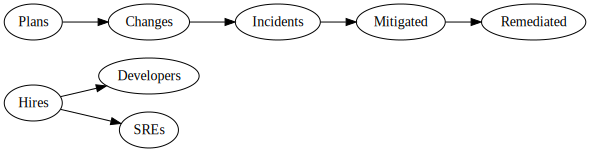

In [7]:
# this will fail on e.g. Binder or if you don't have graphiz installed
as_dot(model)

In [8]:
results = model.run(rounds=10)
rendered = model.render_html(results)
HTML(rendered)
#rendered.replace('\n','').replace("<table>", "<table class=\"table table-bordered\">")

Round,Developers,SREs,Changes,Incidents,Mitigated,Remediated
0,0,0,0,0,0,0
1,5,1,0,0,0,0
2,10,2,10,0,0,0
3,15,3,20,10,0,0
4,20,4,22,24,6,0
5,25,5,8,38,13,1
6,30,6,0,32,22,2
7,35,7,20,20,33,3
8,40,8,58,11,46,4
9,45,9,58,22,45,5


<Figure size 432x288 with 0 Axes>

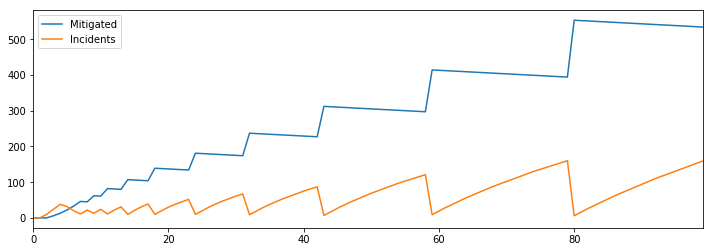

In [10]:
plt.close('all')
results = model.run(rounds=100)
df = pd.DataFrame.from_records(results[1:], columns=['Mitigated', 'Incidents'])
df.cumsum()
plt.figure();
df.plot(figsize=(12, 4));